# Analyzing text

## Load text and extract words

In [3]:
import re # Regex - Regular expressions for matching words/characters

def extract_words(text):
    """Finds all words in a text string"""
    words = re.findall(r"[\w']+", text)

    words = list(map(lambda w: w.upper(), words))
    return words

def extract_characters(text):
    """Finds all characters in a text string"""
    characters = re.findall(r"[a-zA-Z]", text)
    
    characters = list(map(lambda c: c.upper(), characters))
    return characters

# NOT IMPLEMENTED
def remove_names(words):
    return None

In [5]:
text_name = 'Pride and Prejudice'

words = []
with open(f'books/{text_name}.txt', 'r', encoding="utf8") as f:
    contents = f.readlines()
    for line in contents:
        x = extract_words(line)
        words.extend(x)

n_words = len(words)
print(f"Total number of words in the text '{text_name}' is {n_words}")

Total number of words in the text 'Pride and Prejudice' is 123007


## Calculate the frequencies of all unique words

In [52]:
from collections import Counter
frequencies = dict(Counter(words))
print(f'The number of unique words are {len(frequencies)}')

most_common = max(frequencies, key=frequencies.get)
print(f"The most common word is '{most_common}'. it occures {frequencies[most_common]} times. The rate is {frequencies[most_common]/n_words}")

The number of unique words are 6466
The most common word is 'THE'. it occures 4331 times. The rate is 0.03520937832806263


## Frequency plot

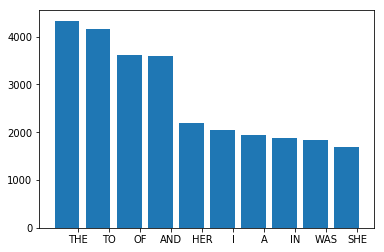

In [48]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

counts = dict(Counter(words).most_common(10))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [55]:
import json
with open(f'frequencies/{text_name}.json', 'w', encoding="utf8") as f:
    json.dump(frequencies, f)